In [65]:
%matplotlib inline
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
gdp_gini_subset = pd.read_csv('wb_data2.csv', sep='\t')
pisa = pd.read_csv('pisa_data.csv', sep='\t')

In [67]:
gdp_gini_15 = gdp_gini_subset[gdp_gini_subset.date == '2015-01-01' ]
pisa_15 = pisa[pisa.date == '2015-01-01']
print gdp_gini_15.describe()

                 gdp        gini
count     217.000000  217.000000
mean    19820.341600   38.958111
std     22371.647864    8.142349
min       666.958172   24.090000
25%      3861.989229   32.840000
50%     11504.748238   37.850000
75%     27177.174080   44.050000
max    127522.671145   63.380000


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


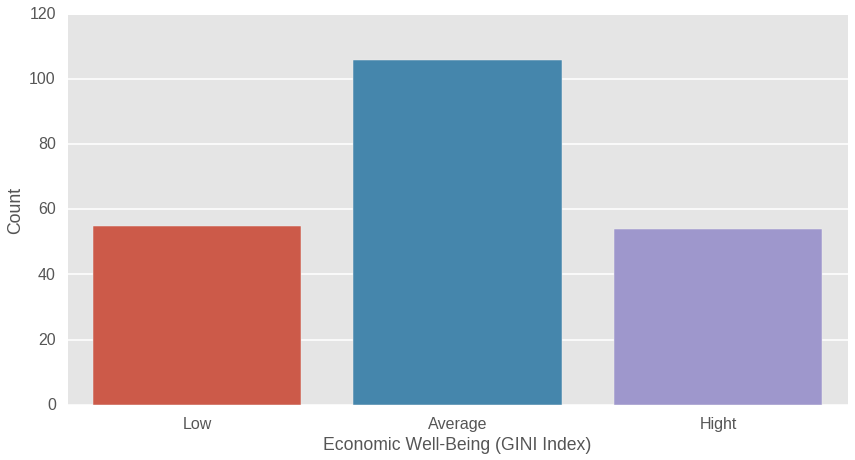

In [68]:
gdp_bins  = [667, 3862, 27177, 127522]
gini_bins = [24,  33,   44,    63]
group_names = ['Low', 'Average', 'Hight']

gdp_gini_15['gdp_categories'] = pd.cut(gdp_gini_15['gdp'], gdp_bins, labels=group_names)
gdp_gini_15['gini_categories'] = pd.cut(gdp_gini_15['gini'], gini_bins, labels=group_names)

sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=gdp_gini_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

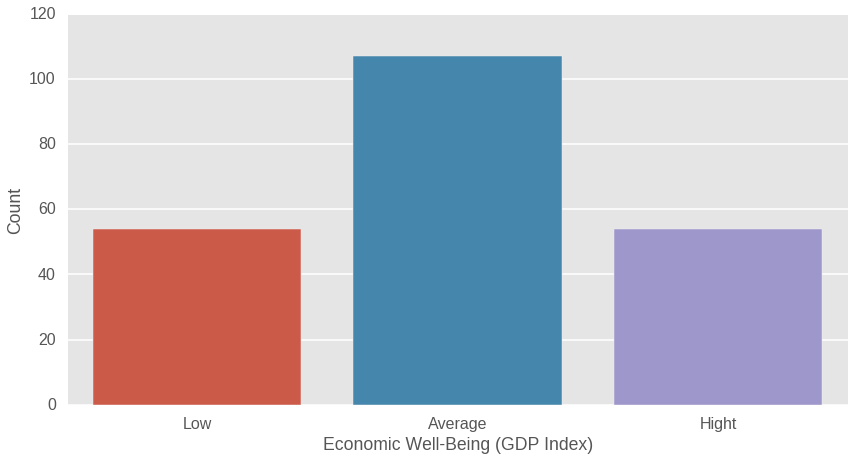

In [69]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=gdp_gini_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Index)')
plt.show()

In [70]:
df_15 = pd.merge(gdp_gini_15, pisa_15, how='right', on=['iso_code','country','date'])
print df_15.head()

  iso_code               country        date           gdp   gini  \
0       AL               Albania  2015-01-01  11504.748238  28.96   
1       AE  United Arab Emirates  2015-01-01  70245.932500  42.67   
2       AR             Argentina  2015-01-01  20337.715945  42.67   
3       AU             Australia  2015-01-01  46475.927752  34.94   
4       AT               Austria  2015-01-01  49419.330062  30.48   

  gdp_categories gini_categories      Math   Reading  
0        Average             Low  413.1570  405.2588  
1          Hight         Average  427.4827  433.5423  
2        Average         Average  409.0333  425.3031  
3          Hight         Average  493.8962  502.9006  
4          Hight             Low  496.7423  484.8656  


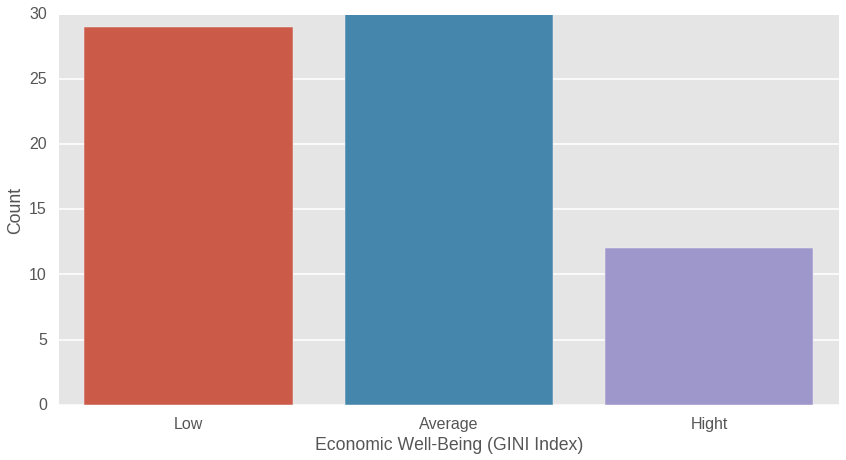

In [71]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=df_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

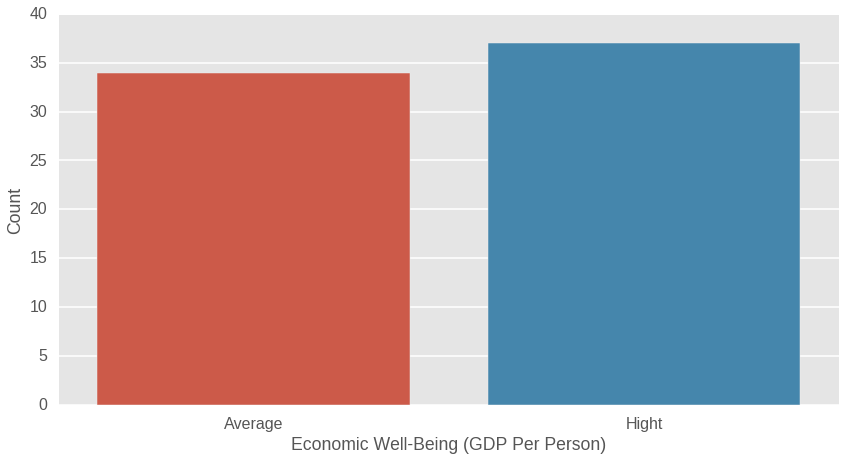

In [72]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=df_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

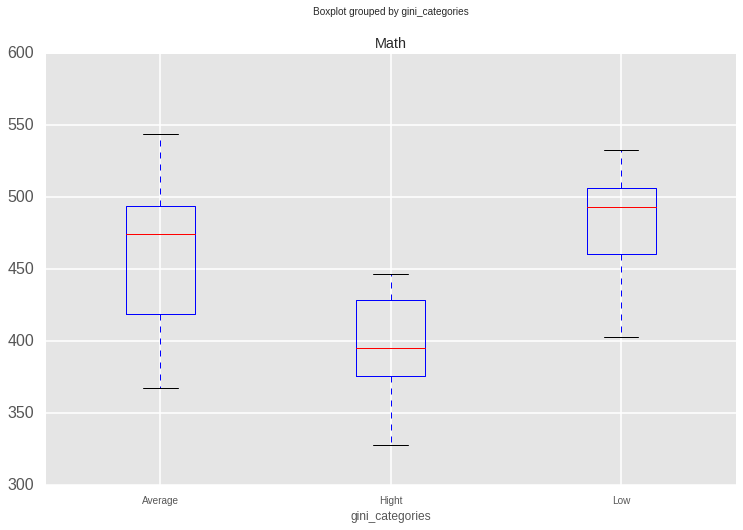

In [73]:
import matplotlib
matplotlib.style.use('ggplot')
df_15.boxplot('Math', by='gini_categories', figsize=(12,8))

In [74]:
mod = ols('Math ~ gini_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                        sum_sq  df         F    PR(>F)
gini_categories   28997.478063   2  5.570998  0.005747
Residual         176972.652796  68       NaN       NaN
0.140784869837


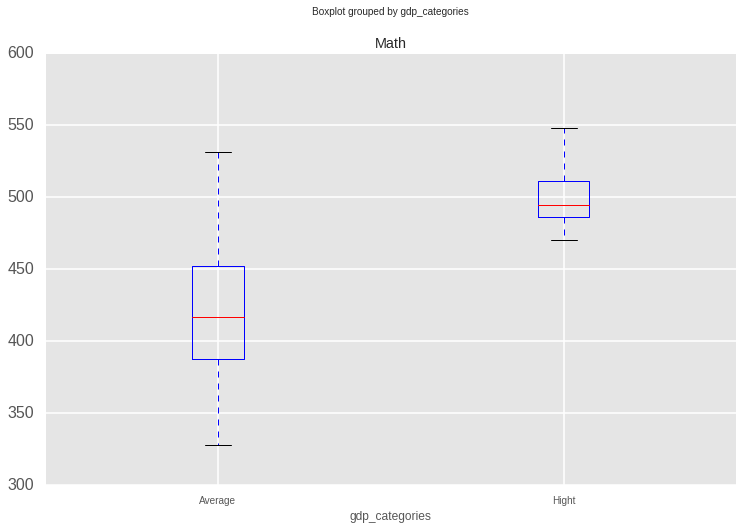

In [75]:
df_15.boxplot('Math', by='gdp_categories', figsize=(12,8))

In [76]:
mod = ols('Math ~ gdp_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                       sum_sq  df          F        PR(>F)
gdp_categories   92737.144802   1  56.510591  1.523553e-10
Residual        113232.986057  69        NaN           NaN
0.450245598307


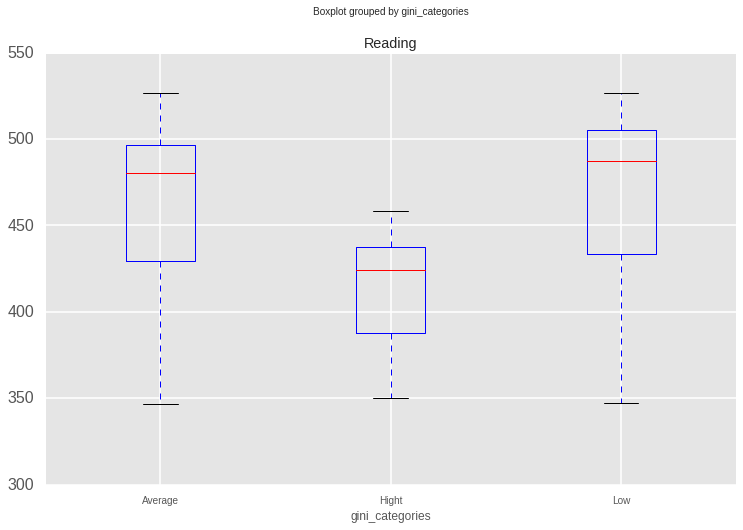

In [77]:
df_15.boxplot('Reading', by='gini_categories', figsize=(12,8))

In [78]:
mod = ols('Reading ~ gini_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                        sum_sq  df         F   PR(>F)
gini_categories   19236.367313   2  4.021542  0.02235
Residual         162633.244522  68       NaN      NaN
0.105770101552


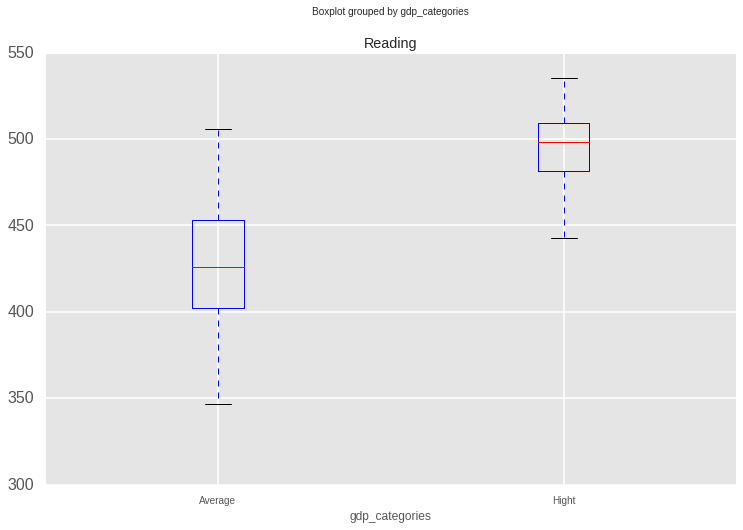

In [79]:
df_15.boxplot('Reading', by='gdp_categories', figsize=(12,8))

In [80]:
mod = ols('Reading ~ gdp_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                       sum_sq  df          F        PR(>F)
gdp_categories   80803.712234   1  55.166541  2.222763e-10
Residual        101065.899601  69        NaN           NaN
0.444294741813


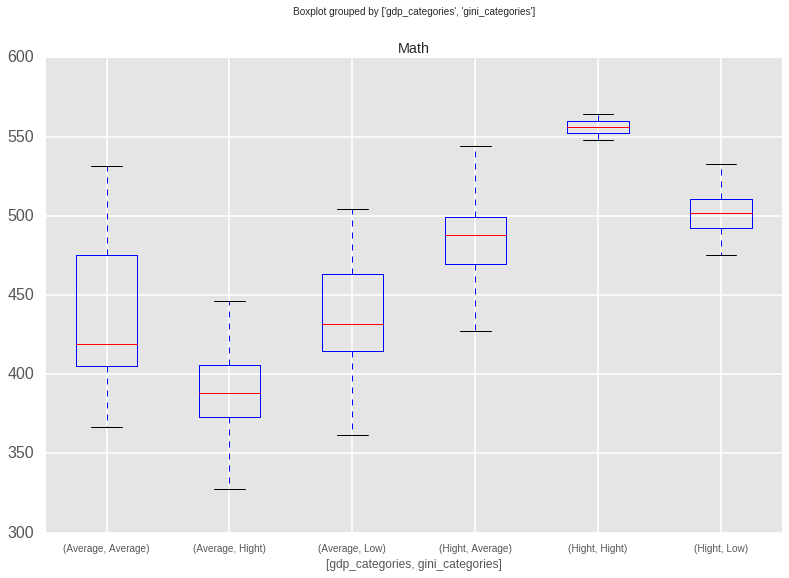

In [81]:
df_15.boxplot('Math', by=['gdp_categories', 'gini_categories'])

In [87]:
mod = ols('Reading ~ gdp_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                       sum_sq  df          F        PR(>F)
gdp_categories   80803.712234   1  55.166541  2.222763e-10
Residual        101065.899601  69        NaN           NaN
0.444294741813


In [88]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

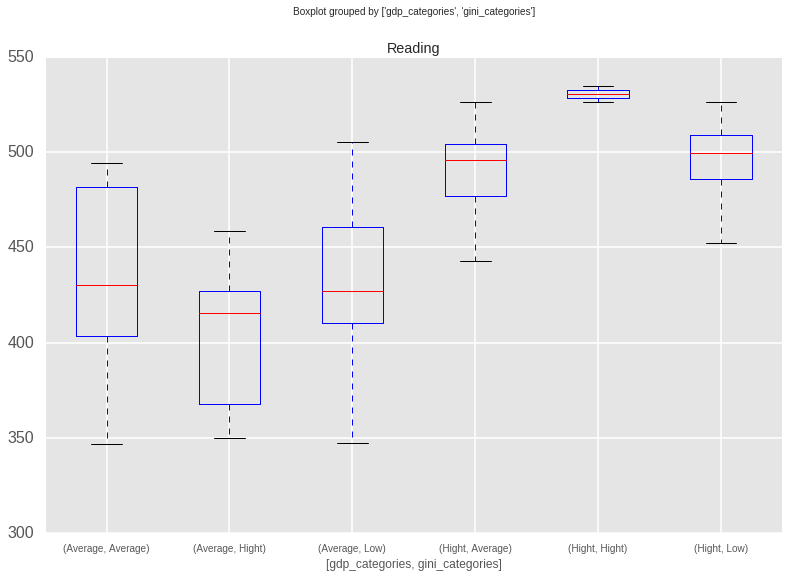

In [89]:
df_15.boxplot('Reading', by=['gdp_categories', 'gini_categories'])

In [90]:
formula = 'Math ~ C(gdp_categories) + C(gini_categories) + C(gdp_categories):C(gini_categories)'
model = ols(formula, df_15).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                                            sum_sq  df          F  \
C(gdp_categories)                     68849.105330   1  50.651665   
C(gini_categories)                     5109.438592   2   1.879484   
C(gdp_categories):C(gini_categories)  19771.232868   2   7.272759   
Residual                              88352.314598  65        NaN   

                                            PR(>F)    eta_sq  omega_sq  
C(gdp_categories)                     1.077397e-09  0.378121  0.367910  
C(gini_categories)                    1.608719e-01  0.028061  0.013034  
C(gdp_categories):C(gini_categories)  1.411476e-03  0.108584  0.092960  
Residual                                       NaN       NaN       NaN  


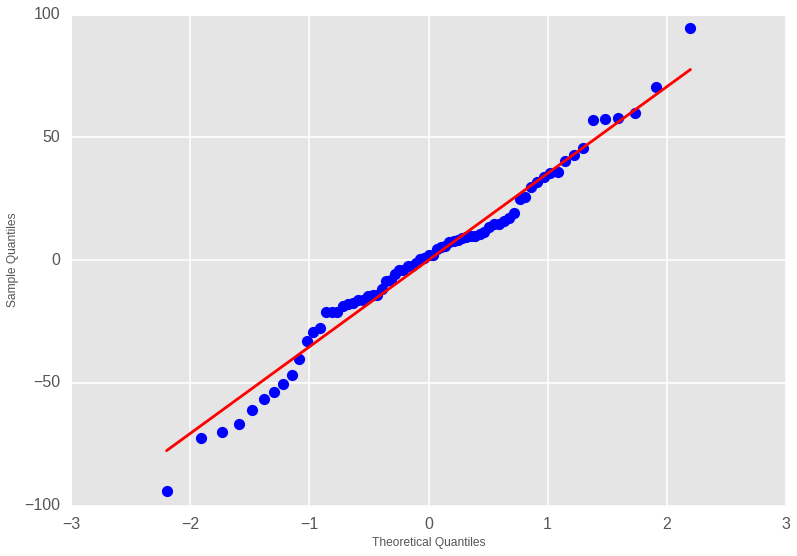

In [91]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()